# <b>Used Car Price Analysis & Prediction</b>

Problem Statement - 

When we want to sell our used cars, we often think, do we get its worth price? Will people think to buy if we keep the price of the car at this rate? and so on. So this is how questions arise. This model will help tackle those questions.         

Goal - 

Here goal is to let the consumer know for what price one must lists the cars on online portal and it also helps to predict the used car prices if we tweak some parameters.

To predict the prices and anlysis we have used so many libraries and multiple regression model.


The data is scrapped from the online car marketplace portal. This data includes the Make, Model, Variant, City, Price, Year, Kilometer, Fuel Type, Owner and so on. Let us build the model. 

<b>Lets import the relevent packages for statistical Analysis</b> 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.3f}'.format #3 decimals after point 
pd.options.display.max_rows = 300 #Max rows of columns 300
pd.options.display.max_columns = 10000 # this will set limit of columns to 10000
# for data visualisation and statistical analysis
%matplotlib inline
import seaborn as sns
sns.set_style("white")

<b>Lets import the relevent packages for models</b> 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingRegressor

<b>We will read the data here</b>

In [3]:
df = pd.read_excel("used-cars-data.xlsx")
df.head(3)

,Sno,State,Make,Model,Variant,Color,City,Mileage,Mfgyear,Owner,Price,Gearbox,Fuel
0,1,Kerala,Ford,Fiesta,EXi 1.4 Durasport,White,Alappuzha,75000,2007,3,120000,Manual,Petrol
1,2,Tamil Nadu,Renault,Kwid,RxT,Grey,Chennai,32000,2016,1,450000,Manual,Petrol
2,3,Maharashtra,Hyundai,Santro Xing,GLS,Grey,Mumbai,70000,2007,2,115000,Manual,Petrol


# Cleaning & Pre-Processing

<b>Lets drop some unwanted columns</b>

In [4]:
df = df.drop(['Sno','State','Color','Gearbox'], axis = 1)
df.head(3)

,Make,Model,Variant,City,Mileage,Mfgyear,Owner,Price,Fuel
0,Ford,Fiesta,EXi 1.4 Durasport,Alappuzha,75000,2007,3,120000,Petrol
1,Renault,Kwid,RxT,Chennai,32000,2016,1,450000,Petrol
2,Hyundai,Santro Xing,GLS,Mumbai,70000,2007,2,115000,Petrol


<b>I am just making all the categorial features (strings) into lower case to maintain the consistency</b>

In [5]:
num_vars = ['Make', "Model", "Variant", "City", "Fuel"]

for i in num_vars:
    df[i] = df[i].map(str).apply(lambda x: x.lower())

<b>Lets find out null values and overcome those values due to which our model can work smoothly or it can not get interrupted</b>

In [6]:
df.isna().sum()

Make         0
Model        0
Variant      0
City         0
Mileage      0
Mfgyear      0
Owner      477
Price        0
Fuel         0
dtype: int64

<b>Now owner contains around 477 null values, so better we could get over of them</b>

In [7]:
df = df[df['Owner'].notnull()]

<b>Here I am taking only cars manufacturer which are famous in Indian market for Used cars</b>

In [8]:
filter_list = ['hyundai', 'maruti suzuki', 'tata', 'mahindra', 'toyota', 'honda', 'ford', 'volkswagen']
df = df[df.Make.isin(filter_list)]

<b>As I am being so curious about the prices, I have done so much R&D on prices</b>
<br>
<b>Lets clean the over prices and too less prices according to analysis, I have done</b>

In [9]:
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "4s fluidic verna") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "accent") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "creta") & (df['Price'] > 2000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "elantra") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "elite i20") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "eon") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "fluidic verna") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "getz") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "getz prime") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "grand i10") & (df['Price'] > 1100000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "i10") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "i20") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "i20 active") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "neo fluidic elantra") & (df['Price'] > 2500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "santa fe") & (df['Price'] > 3500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "santro") & (df['Price'] > 250000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "santro xing") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "sonata") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "sonata embera") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "sonata transform") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "terracan") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "tucson") & (df['Price'] > 3000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "verna") & (df['Price'] > 1700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "hyundai") & (df['Model'] == "xcent") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)


#suzuki - 90

indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "1000") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "800") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "a star") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "alto") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "alto 800") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "alto k10") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "baleno") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "celerio") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "celerio x") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "ciaz") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "dzire") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "eeco") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "ertiga") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "esteem") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "grand vitara") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "gypsy") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "ignis") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "kizashi") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "new swift dzire") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "omni") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "ritz") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "s cross") & (df['Price'] > 1600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "stingray") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "swift") & (df['Price'] > 1100000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "swift dzire") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "swift dzire tour") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "swift old") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "sx4") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "versa") & (df['Price'] > 499999)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "vitara brezza") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "wagon r") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "wagon r 1.0") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "wagon r duo") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "zen") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == "maruti suzuki") & (df['Model'] == "zen estilo") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)

#tata - 90

indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "ace") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "aria") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "bolt") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "estate") & (df['Price'] > 200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "harrier") & (df['Price'] > 2200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "hexa") & (df['Price'] > 2500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indica") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indica ev2") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indica v2") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indica v2 turbo") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indica v2 xeta") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indica vista") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indicab") & (df['Price'] > 300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indigo") & (df['Price'] > 300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indigo cs") & (df['Price'] > 350000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indigo ecs") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indigo marina") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "indigo xl") & (df['Price'] > 450000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "manza") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "movus") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "nano") & (df['Price'] > 320000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "nano genx") & (df['Price'] > 320000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "nexon") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "safari") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "safari storme") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "sierra") & (df['Price'] > 200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "sumo") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "sumo gold") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "sumo grande mk ii") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "tiago") & (df['Price'] > 650000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "tigor") & (df['Price'] > 780000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "tl") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "venture") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "vista tech") & (df['Price'] > 480000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "winger") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "xenon xt") & (df['Price'] > 850000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'tata') & (df['Model'] == "zest") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)


#Honda - 86


indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "accord") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "amaze") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "br-v") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "brio") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "city") & (df['Price'] > 1650000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "city old") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "city zx") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "civic") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "civic hybrid") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "cr v") & (df['Price'] > 2800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "cr v old") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "jazz") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "mobilio") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'honda') & (df['Model'] == "wr-v") & (df['Price'] > 1200000)].index
df.drop(indexNames, inplace=True)


#Mahindra - 87


indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "armada") & (df['Price'] > 300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "bolero") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "e2o plus") & (df['Price'] > 350000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "genio") & (df['Price'] > 650000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "jeep") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "kuv100") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "kuv100 nxt") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "marazzo") & (df['Price'] > 1400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "marshal") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "maxx") & (df['Price'] > 300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "nuvosport") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "quanto") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "scorpio") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "thar") & (df['Price'] > 1300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "tuv300") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "verito") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "verito vibe") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "xuv 300") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "xuv 500") & (df['Price'] > 1400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "xuv500") & (df['Price'] > 2000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'mahindra') & (df['Model'] == "xylo") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)


#Toyota - 94


indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "alphard") & (df['Price'] > 2000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "camry") & (df['Price'] > 3000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "celica") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "commuter") & (df['Price'] > 4000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "corolla") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "corolla altis") & (df['Price'] > 1900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "corolla levin") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "cresta") & (df['Price'] > 1700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "estima t") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "etios") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "etios cross") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "etios liva") & (df['Price'] > 850000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "fortuner") & (df['Price'] > 4000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "innova") & (df['Price'] > 2000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "innova crysta") & (df['Price'] > 2500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "land cruiser") & (df['Price'] > 13000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "land cruiser prado") & (df['Price'] > 7500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "lexus") & (df['Price'] > 1400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "majesta") & (df['Price'] > 100000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "mr2") & (df['Price'] > 680000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "platinum etios") & (df['Price'] > 950000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "prius") & (df['Price'] > 1150000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "qualis") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "sera") & (df['Price'] > 200000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "yaris") & (df['Price'] > 1050000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'toyota') & (df['Model'] == "yaris 1.5 l j") & (df['Price'] > 2000000)].index
df.drop(indexNames, inplace=True)


#Ford - 97

indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "figo") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "ecosport") & (df['Price'] > 1300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "fiesta") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "endeavour") & (df['Price'] > 5000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "ikon") & (df['Price'] > 300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "fiesta (2006 2011)") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "figo aspire") & (df['Price'] > 900000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "fiesta classic") & (df['Price'] > 600000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "classic") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "new fiesta") & (df['Price'] > 700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "fusion") & (df['Price'] > 300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "mustang") & (df['Price'] < 3000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "freestyle") & (df['Price'] > 800000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "raptor") & (df['Price'] > 400000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "mondeo") & (df['Price'] > 300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "escort") & (df['Price'] > 500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'ford') & (df['Model'] == "capri") & (df['Price'] > 250000)].index
df.drop(indexNames, inplace=True)



#Volkswagen - 80


indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "polo") & (df['Price'] > 1050000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "vento") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "jetta") & (df['Price'] > 1500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "ameo") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "passat") & (df['Price'] > 2500000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "cross polo") & (df['Price'] > 1000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "jetta old") & (df['Price'] > 950000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "touareg") & (df['Price'] > 3300000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "tiguan") & (df['Price'] > 3000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "beetle") & (df['Price'] > 1700000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "1600") & (df['Price'] > 525000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "phaeton") & (df['Price'] > 5000000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "caravelle") & (df['Price'] > 1650000)].index
df.drop(indexNames, inplace=True)
indexNames = df[(df['Make'] == 'volkswagen') & (df['Model'] == "gti") & (df['Price'] > 2450000)].index
df.drop(indexNames, inplace=True)  

<b>Lets now sort the mileage (Km run) in ascending and descending order to know the flaws in mileage</b>
<br>
The reason to do this is the car with 0 mileage can not be the used car and the car with more than 1,50,000 lac mileage, people wont be thinking of this to buy it.

In [10]:
mileage_less= df.sort_values("Mileage", ascending = True)
mileage_more= df.sort_values("Mileage", ascending = False)
mileage_less.head(3)

,Make,Model,Variant,City,Mileage,Mfgyear,Owner,Price,Fuel
100995,ford,ecosport,1.5 ti-vct titanium (mt) petrol,pune,0,2018,1,1125000,petrol
12244,toyota,innova,2.5 g (diesel) 7 str euro3,amravati,0,2013,2,1000000,diesel
25660,toyota,innova,2.5 g (diesel) 7 str euro3,akola,0,2013,2,1000000,diesel


In [11]:
mileage_more.head(3)

,Make,Model,Variant,City,Mileage,Mfgyear,Owner,Price,Fuel
48075,hyundai,grand i10,sportz 1.2 vtvt kappa petrol,kolkata,987418548,2017,4+,600000,petrol
78129,tata,sumo,victa ex,pune,959573739,2004,2,150000,diesel
30894,honda,civic,1.8v at,faridabad,74500275,2008,1,275000,petrol


In [12]:
df = df[df["Mileage"] <= 150000]

#There is an possibility of cars who has run less if they are manufactured in recent years (can be 2018, 2019).

df.drop(df[((df['Mileage'] <= 100) & (df['Mfgyear'] < 2017)) | (df['Mileage'] <= 100)].index, inplace=True)

Here we will be taking the cars after 1999 becasue there are very few people interested in vintage cars.</b>
<br>
As I am not taking any luxury cars hence I am putting price limit till 6000000 or 60 lacs

In [13]:
df.sort_values('Mfgyear', ascending=True).head(3)

,Make,Model,Variant,City,Mileage,Mfgyear,Owner,Price,Fuel
5926,mahindra,jeep,cj 500 d,bangalore,50000,1988,4,350000,diesel
25322,mahindra,jeep,mm 540,ahmedabad,1000,1988,2,350000,diesel
34325,maruti suzuki,800,std,chennai,95000,1991,3,60000,petrol


In [14]:
df = df[(df['Mfgyear'] > 1999) & (df['Price'] < 6000000)]

This was the analysis below I had to do earlier, but found that string values in Owner numerical values, and will be overcoming this with simple assumption 

In [15]:
df.loc[((df["Owner"]=="4+") | (df["Owner"]=="4 & more") | (df["Owner"]=="More than 4")), "Owner"] = 5

<b>So this is how our data is clean now</b>
<br>
<b>Now we don't need touch our original data, we will make a copy of it to perform further EDA</b>

In [16]:
df_copy = df.copy()

Let just figure out how does our data behave. In order to do that, we will be doing EDA (Exploratory Data Analysis) 

# EDA

Lets just use ditribution plot to check how is our data distributed over manufacturing years (Mfgyear)

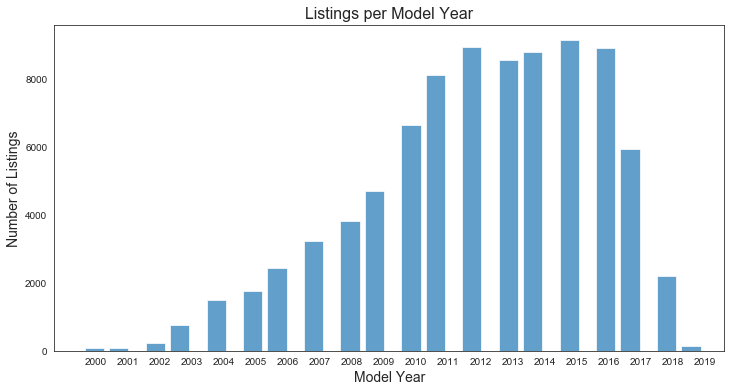

In [17]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
sns.distplot(df_copy["Mfgyear"],kde=False, hist_kws={"alpha":0.7,'width':0.6})
plt.title('Listings per Model Year',fontsize=16)
plt.xticks(sorted(df_copy["Mfgyear"].unique()),horizontalalignment='left')
plt.ylabel('Number of Listings',fontsize=14)
plt.xlabel('Model Year', fontsize=14)
#plt.xlim(2004.5,2017)
plt.show()

Lets just analyse the distribution of listings over total km runs and find mean of mileage by total cars 

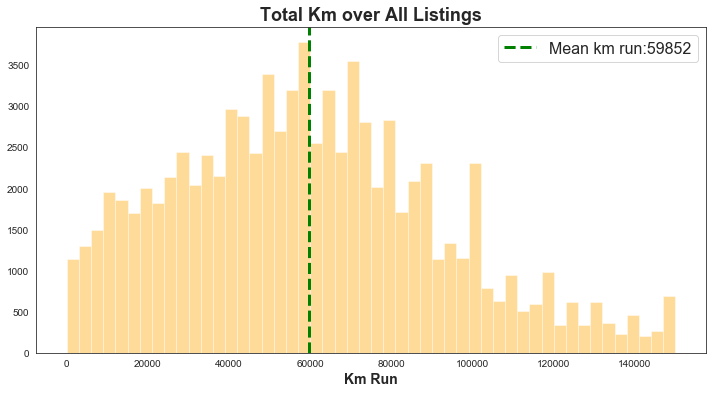

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
sns.distplot(df_copy["Mileage"],kde=False, color = "orange")
plt.xlabel('Km Run',fontsize=14,fontweight="bold")
plt.axvline(df_copy["Mileage"].mean(),lw=3,ls='dashed',
            color='green',label='Mean km run:'+'{0:.0f}'.format(np.mean(df_copy["Mileage"])))
plt.title('Total Km over All Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.show()

We will check now total listings per make

Text(0.5, 1.0, 'Distirbution of listings by Make')

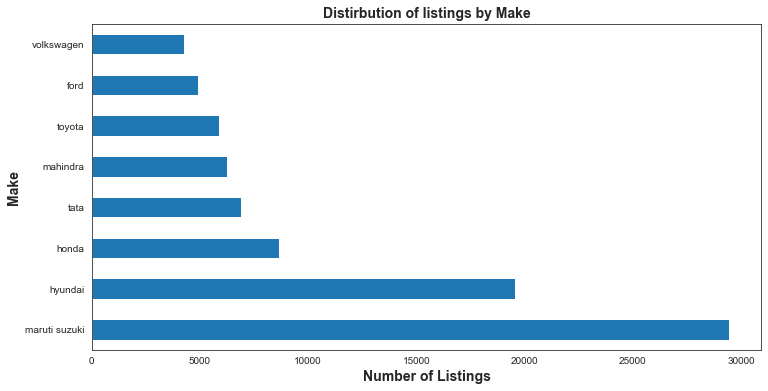

In [19]:
plt.figure(figsize=(12, 6))

df.Make.value_counts().plot(kind='barh')
plt.xlabel('Number of Listings',fontsize=14,fontweight="bold")
plt.ylabel('Make',fontsize=14,fontweight="bold")
plt.title('Distirbution of listings by Make',fontsize=14,fontweight="bold")

Now lets just find out how our prices listed over make

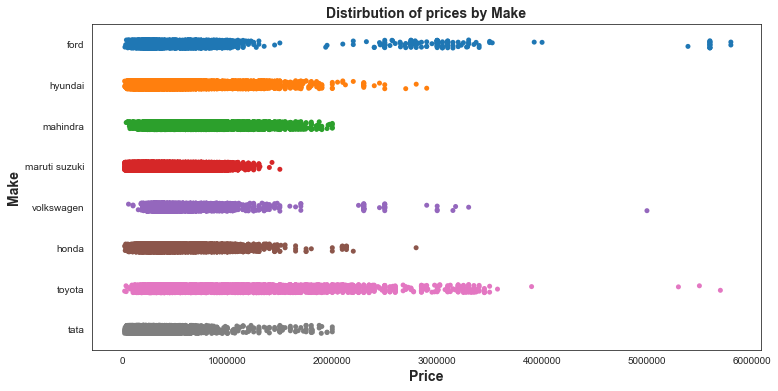

In [20]:
f, ax = plt.subplots(figsize=(12, 6))
sns.stripplot(data = df_copy, x='Price', y='Make', jitter=.1)
plt.xlabel('Price',fontsize=14,fontweight="bold")
plt.ylabel('Make',fontsize=14,fontweight="bold")
plt.title('Distirbution of prices by Make',fontsize=14,fontweight="bold")
plt.show()

From the above graph, we found that ford, toyota and volkswagen cars have outliers and their prices are more as comapred to other manufacturers

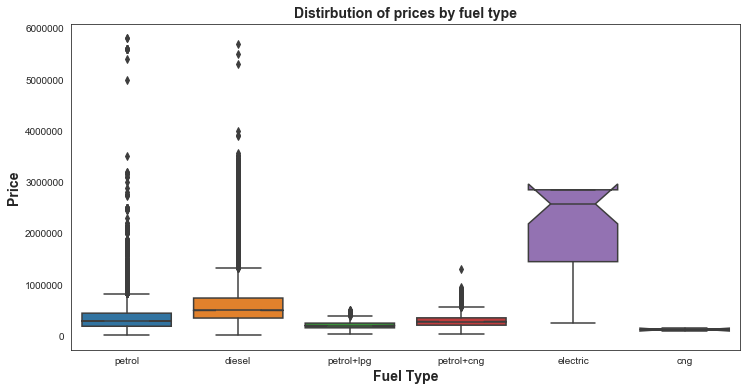

In [21]:
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data = df_copy, x='Fuel', y='Price', notch=True,orient='v')
plt.xlabel('Fuel Type',fontsize=14,fontweight="bold")
plt.ylabel('Price',fontsize=14,fontweight="bold")
plt.title('Distirbution of prices by fuel type',fontsize=14,fontweight="bold")
plt.show()

From the above, we can easily draw electric cars have more prices as compared to other fuel cars 

[Text(0, 0, '-1000000'),
 Text(0, 0, '0'),
 Text(0, 0, '1000000'),
 Text(0, 0, '2000000'),
 Text(0, 0, '3000000'),
 Text(0, 0, '4000000'),
 Text(0, 0, '5000000'),
 Text(0, 0, '6000000'),
 Text(0, 0, '7000000')]

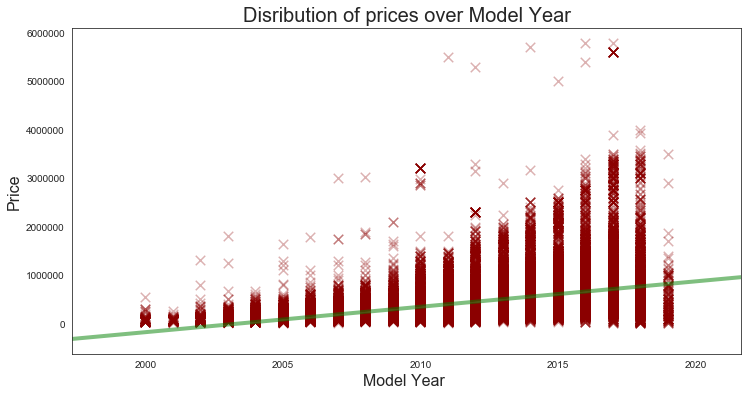

In [22]:
fig, ax = plt.subplots(figsize = (12,6))
sns.regplot(df_copy.Mfgyear, df_copy.Price, data = df_copy, ci = False, 
                scatter_kws={"color":"darkred","alpha":0.3,"s":90}, 
                line_kws={"color":"green","alpha":0.5,"lw":4},marker="x")

plt.title('Disribution of prices over Model Year', fontsize = 20)
plt.ylabel('Price', fontsize = 16)
plt.xlabel('Model Year ', fontsize = 16)
xvals = ax.get_xticks()
ax.set_xticklabels(['{}'.format(int(x)) for x in xvals])

yvals = ax.get_yticks()
ax.set_yticklabels(['{}'.format(int(y)) for y in yvals])

<b>In the above regression plot, we can clearly see the best fit line is drawn and we can get insight of model year 2015 have best possible price around 5 lacs to 6 lacs.</b> 

# Modelling 

Let just work on our model. For that, we will be using train_test_split function.<br> 
Models Used are :<br>
1) Linear Regression<br>
2) KNN Regression<br>
3) Decision Tree Regression<br>
4) XGBoost<br>

In [23]:
X = df_copy.drop("Price", axis = "columns")
y = df_copy.Price
# now we use the train_test_split function already available in sklearn library to split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 42)

I have used column transformer to trasnform the columns with one hot encoding for categorical features and to bypasss the numerical features.
<br>
Categorical features are: Make, Model, Variant, City, Fuel
Numerical features are: Mileage, Mfgyear and Owner
<br>
Column transformer will simply convert categorical features into 0s, 1s and simply adds the numerical columns in the data. You can <a href="https://www.youtube.com/watch?v=irHhDMbw3xo&t=1371s">check here</a>

In [24]:
hot = OneHotEncoder(sparse=False, handle_unknown='ignore')
column_trans = make_column_transformer((hot, ['Make', 'Model', 'Variant', 'City', 'Fuel']), remainder="passthrough")

<b>For KNN, we can not directly define neighbours, In roder to decide the neighbours value, we should check with all the neighbours with lowest RMSE value</b><br>
It might take some time to traverse through all the neighbors  

In [25]:
all_rmse = []
nbrs = []
for n in range(2, 12):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    pipe_knn = make_pipeline(column_trans, knn)
    pipe_knn.fit(X_train, Y_train)
    predicted = pipe_knn.predict(X_test)
    all_rmse.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    nbrs.append(n)

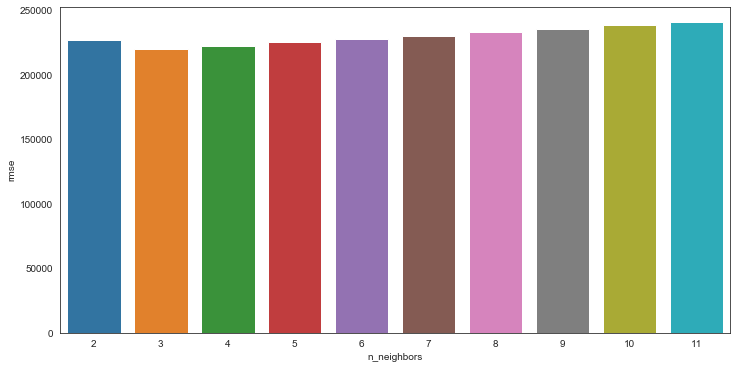

In [27]:
ax = plt.figure(figsize=(12,6))
check_best_nbr = pd.DataFrame()
check_best_nbr['rmse'] = all_rmse
check_best_nbr['n_neighbors'] = nbrs
sns.barplot(data = check_best_nbr, x = 'n_neighbors', y = 'rmse')
plt.show()

<b>Here I am initializing all the models.</b> 

In [28]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
dtr = DecisionTreeRegressor(max_features='auto')
linear_reg = LinearRegression()

<b>Here I am chaining the all processes with pipeline function.</b> 

In [29]:
pipe_linear = make_pipeline(column_trans, linear_reg)
pipe_knn = make_pipeline(column_trans, knn)
pipe_tree = make_pipeline(column_trans, dtr)
pipe_gbr = make_pipeline(column_trans,gbr)

Here we are using R2_score and if R2_score is more then we get low variablity in y ie. prices and vice versa.

To check the accuracy, we will be taking rmse value of all the models.

Here RMSE value indicates standard deviation of residuals where residuals are Y_test (Actual) - Y_predicted (forecasted) for each data point

## Linear Regression Accuracy

In [30]:
pipe_linear.fit(X_train, Y_train)
linear_predicted = pipe_linear.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(Y_test, linear_predicted))
print("Linear regression RMSE: %f" % rmse_linear + " & Accuracy score: %.2f" % r2_score(Y_test, linear_predicted))

Linear regression RMSE: 5267459066.611786 & Accuracy score: -236168078.46


## KNN Accuracy

In [32]:
pipe_knn.fit(X_train, Y_train)
knn_predicted = pipe_knn.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(Y_test, knn_predicted))
print("KNN RMSE: %f" % rmse_knn + ' & Accuracy score: %.2f' % r2_score(Y_test, knn_predicted))

KNN RMSE: 219974.253894 & Accuracy score: 0.59


## Decision Tree Regression Accuracy

In [33]:
pipe_tree.fit(X_train, Y_train)
tree_predicted = pipe_tree.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(Y_test, tree_predicted))
print("Tree RMSE: %f" % rmse_tree + ' & Accuracy score: %.2f' % r2_score(Y_test, tree_predicted))

Tree RMSE: 103435.667940 & Accuracy score: 0.91


## XGBoost Accuracy

In [34]:
pipe_gbr.fit(X_train, Y_train)
gbr_predicted = pipe_gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(Y_test, gbr_predicted))
print("GBR RMSE: %f" % rmse_gbr + ' & Accuracy score: %.2f' % r2_score(Y_test, gbr_predicted))

GBR RMSE: 101933.249355 & Accuracy score: 0.91


### Here we clearly get to see that XGBoost is best among all as It has more R2_square value than others, Accuracy score is High 

In [35]:
A = Y_test.values.reshape(-1, 1)
B = tree_predicted.reshape(-1, 1)
C = gbr_predicted.reshape(-1, 1)

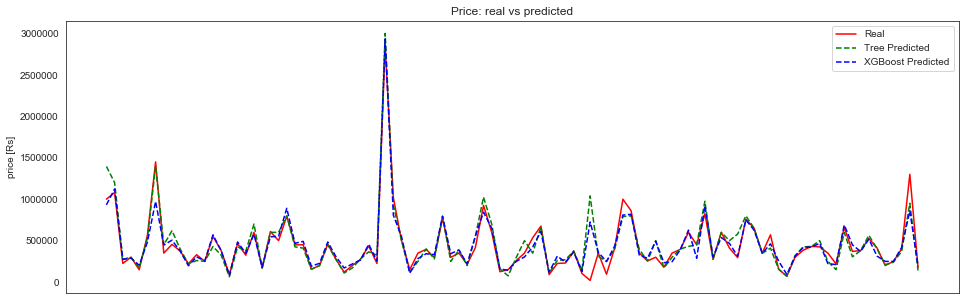

In [38]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real", color="Red")
plt.plot(B[-100:], label="Tree Predicted", linestyle='dashed', color = "green")
plt.plot(C[-100:], label="XGBoost Predicted", linestyle='dashed', color = "blue")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price [Rs]")
plt.xticks(())
plt.show()